# Forex Prediction

In [1]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import tensorflow

/home/ishadi/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
   n_vars = 1 if type(data) is list else data.shape[1]
   df = DataFrame(data)
   cols, names = list(), list()
   # input sequence (t-n, ... t-1)
   for i in range(n_in, 0, -1):
      cols.append(df.shift(i))
      names += [('var%d(t-%d)' % (j + 1, i)) for j in range(n_vars)]
   # forecast sequence (t, t+1, ... t+n)
   for i in range(0, n_out):
      cols.append(df.shift(-i))
      if i == 0:
         names += [('var%d(t)' % (j + 1)) for j in range(n_vars)]
      else:
         names += [('var%d(t+%d)' % (j + 1, i)) for j in range(n_vars)]
   # put it all together
   agg = concat(cols, axis=1)
   agg.columns = names

   # drop rows with NaN values
   if dropnan:
     agg.dropna(inplace=True)
   return agg

In [3]:
# pip install tailer
import tailer as tl
import pandas as pd
import io

In [4]:
# # get the latest 200 records from the frequently updating data file
# file = open('training_set.txt')
# lastLines = tl.tail(file,200) #to read last 200 lines
# file.close()
# dataset=pd.read_csv(io.StringIO('\n'.join(lastLines)),index_col=0)
# values = dataset.values
# print(values)

In [5]:
# load dataset
dataset = read_csv('Output.txt',index_col=0)  #, nrows=5
dataset = dataset[-100:]

In [6]:
dataset

,1.13806,1.13805,1.13806.1,0
1541178970,,,,
1541184970,1.13853,1.13853,1.13853,0
1541185030,1.13836,1.13836,1.13836,0
1541185090,1.13828,1.13828,1.13828,0
1541185150,1.13841,1.13841,1.13842,0
1541185210,1.13928,1.13928,1.13928,0
1541185270,1.13916,1.13916,1.13917,0
1541185330,1.13911,1.13911,1.13911,0
1541185390,1.13935,1.13935,1.13935,0
1541185450,1.13933,1.13933,1.13933,0


In [7]:
values = dataset.values

In [8]:
print(values)

[[1.13853 1.13853 1.13853 0.     ]
 [1.13836 1.13836 1.13836 0.     ]
 [1.13828 1.13828 1.13828 0.     ]
 [1.13841 1.13841 1.13842 0.     ]
 [1.13928 1.13928 1.13928 0.     ]
 [1.13916 1.13916 1.13917 0.     ]
 [1.13911 1.13911 1.13911 0.     ]
 [1.13935 1.13935 1.13935 0.     ]
 [1.13933 1.13933 1.13933 0.     ]
 [1.13912 1.13912 1.13912 0.     ]
 [1.13901 1.13901 1.13901 0.     ]
 [1.13891 1.13891 1.13891 0.     ]
 [1.13899 1.13899 1.13899 0.     ]
 [1.13878 1.13878 1.13878 0.     ]
 [1.13891 1.13891 1.13891 0.     ]
 [1.13886 1.13886 1.13886 0.     ]
 [1.13867 1.13867 1.13867 0.     ]
 [1.13873 1.13873 1.13873 0.     ]
 [1.13881 1.1388  1.13881 0.     ]
 [1.13885 1.13885 1.13885 0.     ]
 [1.13879 1.13879 1.13879 0.     ]
 [1.13888 1.13888 1.13888 0.     ]
 [1.13891 1.1389  1.13891 0.     ]
 [1.13891 1.13891 1.13891 0.     ]
 [1.13898 1.13898 1.13898 0.     ]
 [1.13902 1.13901 1.13902 0.     ]
 [1.13916 1.13916 1.13917 0.     ]
 [1.13917 1.13917 1.13917 0.     ]
 [1.13916 1.13916 1.

In [9]:
# ensure all data is float
values = values.astype('float32')

In [10]:
# normalize features
scaler = MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(values)

In [11]:
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)

In [12]:
# new = reframed.tail(200)

In [13]:
print(reframed.head(5))

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)   var1(t)   var2(t)   var3(t)  \
1   0.179810   0.179810   0.179810        0.0  0.057556  0.057556  0.057556   
2   0.057556   0.057556   0.057556        0.0  0.000000  0.000000  0.000000   
3   0.000000   0.000000   0.000000        0.0  0.093445  0.093445  0.100647   
4   0.093445   0.093445   0.100647        0.0  0.719360  0.719360  0.719360   
5   0.719360   0.719360   0.719360        0.0  0.633118  0.633118  0.640320   

   var4(t)  
1      0.0  
2      0.0  
3      0.0  
4      0.0  
5      0.0  


In [14]:
# drop columns we don't want to predict
reframed.drop(reframed.columns[[5,6,7]], axis=1, inplace=True)

In [15]:
# print 1st 5 rows of transformed dataset, can observe 2 input variables (input series) and the 1 output variable (NZX50 index for next month).
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)   var1(t)
1   0.179810   0.179810   0.179810        0.0  0.057556
2   0.057556   0.057556   0.057556        0.0  0.000000
3   0.000000   0.000000   0.000000        0.0  0.093445
4   0.093445   0.093445   0.100647        0.0  0.719360
5   0.719360   0.719360   0.719360        0.0  0.633118


In [16]:
# split into train and test sets
values = reframed.values
n_train_hours = 80

In [17]:
# data rows up to 660
train = values[:n_train_hours, :]

In [18]:
# data rows after 660
test = values[n_train_hours:, :]

In [19]:
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
print('Train data')
print(train_X)

Train data
[[0.17980957 0.17980957 0.17980957 0.        ]
 [0.05755615 0.05755615 0.05755615 0.        ]
 [0.         0.         0.         0.        ]
 [0.09344482 0.09344482 0.10064697 0.        ]
 [0.71936035 0.71936035 0.71936035 0.        ]
 [0.6331177  0.6331177  0.6403198  0.        ]
 [0.5970459  0.5970459  0.5970459  0.        ]
 [0.7697754  0.7697754  0.7697754  0.        ]
 [0.7553711  0.7553711  0.7553711  0.        ]
 [0.60424805 0.60424805 0.60424805 0.        ]
 [0.52508545 0.52508545 0.52508545 0.        ]
 [0.45324707 0.45324707 0.45324707 0.        ]
 [0.5108032  0.5108032  0.5108032  0.        ]
 [0.35968018 0.35968018 0.35968018 0.        ]
 [0.45324707 0.45324707 0.45324707 0.        ]
 [0.41723633 0.41723633 0.41723633 0.        ]
 [0.28051758 0.28051758 0.28051758 0.        ]
 [0.32373047 0.32373047 0.32373047 0.        ]
 [0.38128662 0.37408447 0.38128662 0.        ]
 [0.41003418 0.41003418 0.41003418 0.        ]
 [0.36688232 0.36688232 0.36688232 0.        ]
 [

In [20]:
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
print('Train shape')
print(train_X.shape)
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

Train shape
(80, 1, 4)


In [21]:
# prints the shape of the train and test input and output sets with about 2000 of data for training and about 671 for testing.
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(80, 1, 4) (80,) (19, 1, 4) (19,)


In [22]:
# define LSTM design network with 50 neurons in the first hidden layer and 1 neuron in the output layer for predicting pollution. The input shape will be 1 time step with 3 features. 
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))

In [23]:
#use the Mean Absolute Error (MAE) loss function and the efficient Adam version of stochastic gradient descent
model.compile(loss='mse', optimizer='rmsprop')

In [24]:
# fit network. The model will be fit for 262 training epochs with a batch size of 300 and  keep track of both the training and test loss during training by setting the validation_data argument in the fit() function.

history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle= False)

Train on 80 samples, validate on 19 samples
Epoch 1/50
 - 1s - loss: 0.5723 - val_loss: 0.6502
Epoch 2/50
 - 0s - loss: 0.4992 - val_loss: 0.5931
Epoch 3/50
 - 0s - loss: 0.4551 - val_loss: 0.5475
Epoch 4/50
 - 0s - loss: 0.4198 - val_loss: 0.5078
Epoch 5/50
 - 0s - loss: 0.3891 - val_loss: 0.4720
Epoch 6/50
 - 0s - loss: 0.3614 - val_loss: 0.4390
Epoch 7/50
 - 0s - loss: 0.3358 - val_loss: 0.4079
Epoch 8/50
 - 0s - loss: 0.3118 - val_loss: 0.3786
Epoch 9/50
 - 0s - loss: 0.2891 - val_loss: 0.3508
Epoch 10/50
 - 0s - loss: 0.2677 - val_loss: 0.3242
Epoch 11/50
 - 0s - loss: 0.2472 - val_loss: 0.2988
Epoch 12/50
 - 0s - loss: 0.2277 - val_loss: 0.2745
Epoch 13/50
 - 0s - loss: 0.2090 - val_loss: 0.2513
Epoch 14/50
 - 0s - loss: 0.1913 - val_loss: 0.2290
Epoch 15/50
 - 0s - loss: 0.1743 - val_loss: 0.2078
Epoch 16/50
 - 0s - loss: 0.1582 - val_loss: 0.1876
Epoch 17/50
 - 0s - loss: 0.1429 - val_loss: 0.1685
Epoch 18/50
 - 0s - loss: 0.1284 - val_loss: 0.1504
Epoch 19/50
 - 0s - loss: 0.1

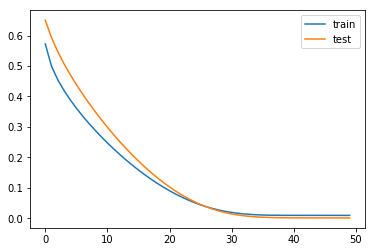

In [25]:
# At the end of the run both the training and test loss are plotted.
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [26]:
# test_X

In [27]:
# After the model is fit, model can be used to forecast for the entire test dataset.
 
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

In [28]:
# invert scaling for forecast 
#Combine the forecast with the test dataset and invert the scaling. Then invert scaling on the test dataset with the expected NZX50 numbers.

inv_yhat = concatenate((test_X[:, 1:],yhat), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:, 0]

# inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
# inv_yhat = scaler.inverse_transform(inv_yhat)
# inv_yhat = inv_yhat[:,0]



In [29]:
#Print predicted values for test data
print('yhat x')
print(inv_yhat)

yhat x
[1.13938 1.13938 1.13942 1.13942 1.13939 1.1394  1.13942 1.13947 1.13946
 1.13943 1.13946 1.13948 1.13948 1.13946 1.13947 1.13948 1.13948 1.13941
 1.13935]


In [30]:
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_X[:, 1:],test_y), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:, 1]

In [31]:
# calculate RMSE
#With forecasts and actual values in their original scale, it is possible to calculate an error score for the model. In this case, calculate the Root Mean Squared Error (RMSE) that gives error in the same units as the variable itself

rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' %rmse)

Test RMSE: 0.000
